In [128]:
import matplotlib.pyplot as plt
from generate_plots import convert_tb_data

In [218]:
def generate_plot(df, col_name, title=None, filter_outliers=False, rolling_mean=False):
    df_filtered = df[df.name == col_name].reset_index(drop=True)
    # Filter outliers:
    if filter_outliers:
        df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
    if rolling_mean:
        df_filtered.value = df_filtered.value.rolling(50).median()
    fig, ax = plt.subplots(1,1)
    df_filtered[['value']].plot(ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Episodes")
    ax.legend().remove()
    # ax.set_ylim([0, 0.3 * 1e9])
    ax.grid()
    fig.set_size_inches(7, 3.5)
    return fig



def format_plot(session_id, run_id, col_name="losses/q_loss", filter_outliers=False, rolling_mean=True):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)
    fig = generate_plot(df, col_name, title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=filter_outliers, rolling_mean=rolling_mean)
    fig.savefig(f"./plots/session_{session_id}_run_{run_id}_q_loss")
    return df

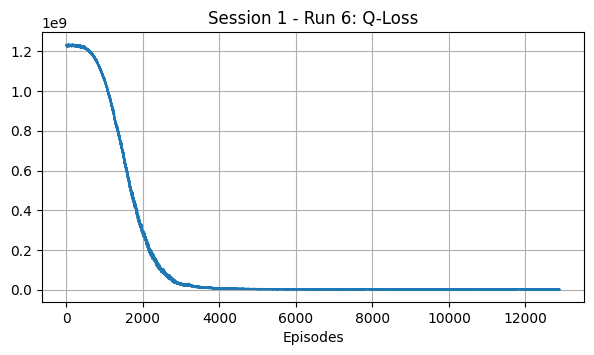

In [219]:
df = format_plot(1, 6, rolling_mean=False)

In [200]:
session_id = 1
run_id = 1
FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
df = convert_tb_data(FILE_PATH)

In [ ]:
def plot_agent_loss(session_id, run_id, agent_num):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)
    col_name = lambda i: f"agent{i}/losses/pol_loss"
    for i in range(agent_num):
        fig = generate_plot(df, col_name, title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=False, rolling_mean=True)

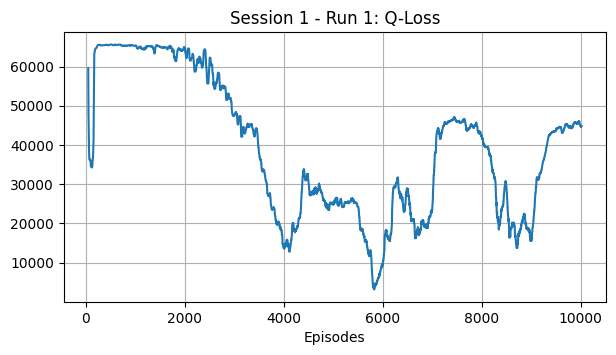

In [202]:
col_name = "agent0/losses/pol_loss"
fig = generate_plot(df, col_name, title=f"Session {session_id} - Run {run_id}: Q-Loss", filter_outliers=False, rolling_mean=True)